In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [12]:
data = pd.read_csv("data.csv")

print("\nFirst 5 rows of dataset:")
print(data.head())


First 5 rows of dataset:
   Id  Area  Bedrooms  Bathrooms  Floors  YearBuilt  Location  Condition  \
0   1  1360         5          4       3       1970  Downtown  Excellent   
1   2  4272         5          4       3       1958  Downtown  Excellent   
2   3  3592         2          2       3       1938  Downtown       Good   
3   4   966         4          2       2       1902  Suburban       Fair   
4   5  4926         1          4       2       1975  Downtown       Fair   

  Garage   Price  
0     No  149919  
1     No  424998  
2     No  266746  
3    Yes  244020  
4    Yes  636056  


In [13]:
print("\nMissing values:")
print(data.isnull().sum())

data = data.dropna()

data = data.drop_duplicates()


Missing values:
Id           0
Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64


In [14]:
print("\nStatistical Summary:")
print(data.describe())


Statistical Summary:
                Id         Area     Bedrooms   Bathrooms       Floors  \
count  2000.000000  2000.000000  2000.000000  2000.00000  2000.000000   
mean   1000.500000  2786.209500     3.003500     2.55250     1.993500   
std     577.494589  1295.146799     1.424606     1.10899     0.809188   
min       1.000000   501.000000     1.000000     1.00000     1.000000   
25%     500.750000  1653.000000     2.000000     2.00000     1.000000   
50%    1000.500000  2833.000000     3.000000     3.00000     2.000000   
75%    1500.250000  3887.500000     4.000000     4.00000     3.000000   
max    2000.000000  4999.000000     5.000000     4.00000     3.000000   

         YearBuilt          Price  
count  2000.000000    2000.000000  
mean   1961.446000  537676.855000  
std      35.926695  276428.845719  
min    1900.000000   50005.000000  
25%    1930.000000  300098.000000  
50%    1961.000000  539254.000000  
75%    1993.000000  780086.000000  
max    2023.000000  999656.00000

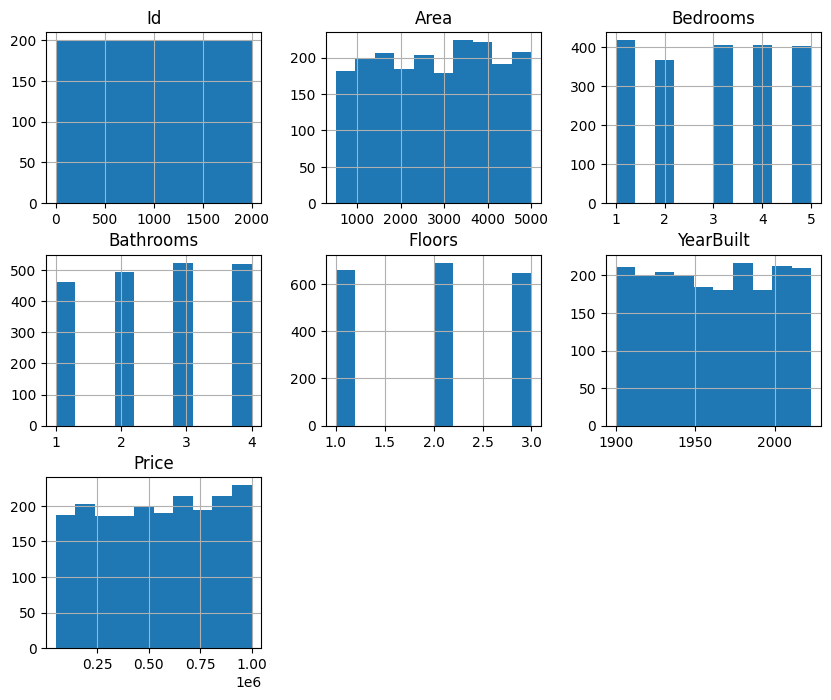

In [15]:
data.hist(figsize=(10,8))
plt.show()

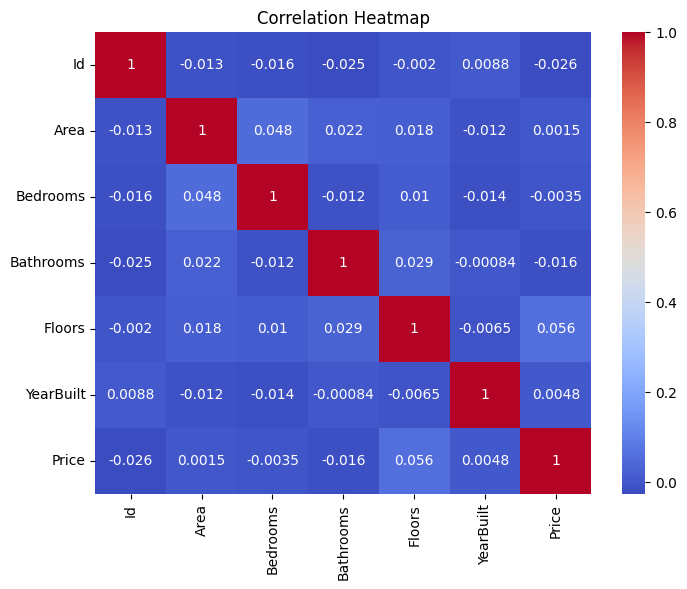


After Encoding:
   Id  Area  Bedrooms  Bathrooms  Floors  YearBuilt   Price  Location_Rural  \
0   1  1360         5          4       3       1970  149919           False   
1   2  4272         5          4       3       1958  424998           False   
2   3  3592         2          2       3       1938  266746           False   
3   4   966         4          2       2       1902  244020           False   
4   5  4926         1          4       2       1975  636056           False   

   Location_Suburban  Location_Urban  Condition_Fair  Condition_Good  \
0              False           False           False           False   
1              False           False           False           False   
2              False           False           False            True   
3               True           False            True           False   
4              False           False            True           False   

   Condition_Poor  Garage_Yes  
0           False       False  
1          

In [17]:
plt.figure(figsize=(8,6))

numeric_data = data.select_dtypes(include=['number'])

sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap")
plt.show()

data = pd.get_dummies(data, drop_first=True)

print("\nAfter Encoding:")
print(data.head())

X = data.drop("Price", axis=1)
y = data["Price"]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [19]:
model = LinearRegression()
model.fit(X_train, y_train)

print("\nModel trained successfully")


Model trained successfully


In [20]:
y_pred = model.predict(X_test)

In [21]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print("MAE  :", mae)
print("MSE  :", mse)
print("RMSE :", rmse)
print("R2 Score :", r2)


Model Evaluation:
MAE  : 242867.44926338625
MSE  : 78279764120.86241
RMSE : 279785.2106900263
R2 Score : -0.006181784611834162


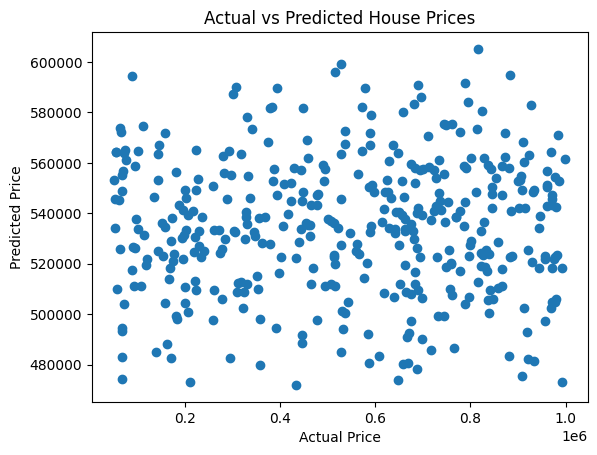

In [23]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.show()